In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

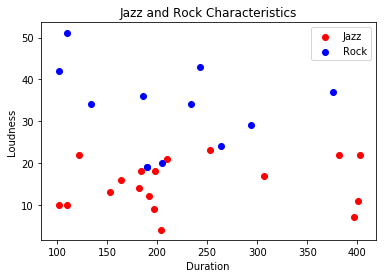

In [63]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0], dtype=int64)

In [5]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[ 0.4  0.6]]


In [28]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .10

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])


In [37]:
Y

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0], dtype=int64)

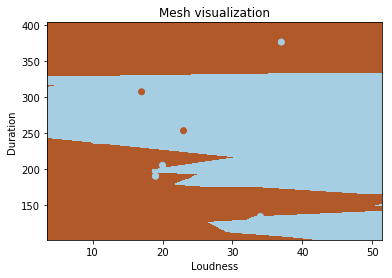

In [38]:

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [31]:
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [13]:
x_min

3.5

In [14]:
x_max

51.5

In [24]:
xx

array([[  3.5,   3.6,   3.7, ...,  51.2,  51.3,  51.4],
       [  3.5,   3.6,   3.7, ...,  51.2,  51.3,  51.4],
       [  3.5,   3.6,   3.7, ...,  51.2,  51.3,  51.4],
       ..., 
       [  3.5,   3.6,   3.7, ...,  51.2,  51.3,  51.4],
       [  3.5,   3.6,   3.7, ...,  51.2,  51.3,  51.4],
       [  3.5,   3.6,   3.7, ...,  51.2,  51.3,  51.4]])

In [25]:
yy

array([[ 101.5,  101.5,  101.5, ...,  101.5,  101.5,  101.5],
       [ 101.6,  101.6,  101.6, ...,  101.6,  101.6,  101.6],
       [ 101.7,  101.7,  101.7, ...,  101.7,  101.7,  101.7],
       ..., 
       [ 403.2,  403.2,  403.2, ...,  403.2,  403.2,  403.2],
       [ 403.3,  403.3,  403.3, ...,  403.3,  403.3,  403.3],
       [ 403.4,  403.4,  403.4, ...,  403.4,  403.4,  403.4]])

In [17]:
xx.ravel()

array([  3.5,   3.6,   3.7, ...,  51.2,  51.3,  51.4])

In [26]:
yy.ravel()

array([ 101.5,  101.5,  101.5, ...,  403.4,  403.4,  403.4])

In [21]:
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [27]:
 np.c_[[1,2],[3,4]]

array([[1, 3],
       [2, 4]])

In [90]:
def predict_knn(df, x, y, k):
    df_eud = pd.DataFrame()
    df_eud = df
    df_eud['eud'] = ((df[df.columns[1]] - x)**2) + ((df[df.columns[0]] - y)**2)
    df_topk = df_eud.sort_values('eud',ascending=True).head(k)
    df_topk2 = df_topk['jazz']
    z = df_topk2.sum()/k
    if z >= .5:
        return 1
    else:
        return 0




In [91]:
print(predict_knn(music, 24,190,1))


0
